#### 提前导入相关库

In [19]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['font.sans-serif'] = ['STsong']
matplotlib.rcParams['axes.unicode_minus'] = False
path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

#### 读取数据并删除缺失值，可以发现有179个样本存在缺失值，原始数据集中有891个样本，去除后异常值后还有712个样本

In [20]:
data = pd.read_csv(FilesIO.getHomeworkData("Titanic.csv"))
print(data.isnull().sum())
data1 = data.dropna()
print()
print(data1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### 对数据集中人们的生存状况进行可视化(如下图所示)，在去除异常值后的数据集中，一共有549人未存活，342人存活

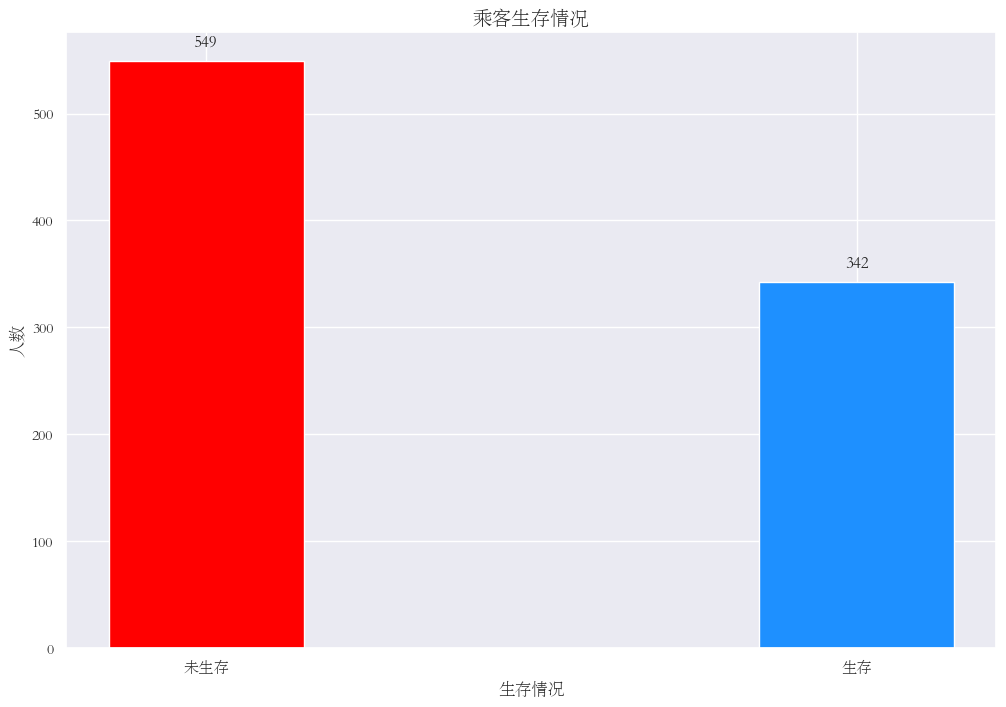

In [21]:
plt.figure(figsize=(12,8))
survived_data = data["Survived"].value_counts()
survived_data = np.array(survived_data)
plt.bar(range(2),survived_data,color=["red","dodgerblue"],width=0.3)
plt.annotate(f'{survived_data[0]}', xy=(0, survived_data[0]), xytext=(0, survived_data[0]+10),ha='center', va='bottom', fontsize=12)
plt.annotate(f'{survived_data[1]}', xy=(1, survived_data[1]), xytext=(1, survived_data[1]+10),ha='center', va='bottom', fontsize=12)
plt.xticks([0,1],["未生存","生存"])
plt.xlabel("生存情况",fontdict={"fontsize":12})
plt.ylabel("人数",fontdict={"fontsize":12})
plt.title("乘客生存情况",fontdict={"fontsize":14})
plt.show()

#### 定义函数 percentage_above_bar_relative_to_xgroup， 使得流失百分比显示在条形上方

In [22]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=14, ha='center', va='bottom')


#### Pclass对生存状况的影响。船舱等级越高存活率越高，一等舱只有34.8%的乘客死亡，二等舱有将近一半的乘客死亡，而三等舱有76.8%的乘客死亡，只有不到四分之一存活

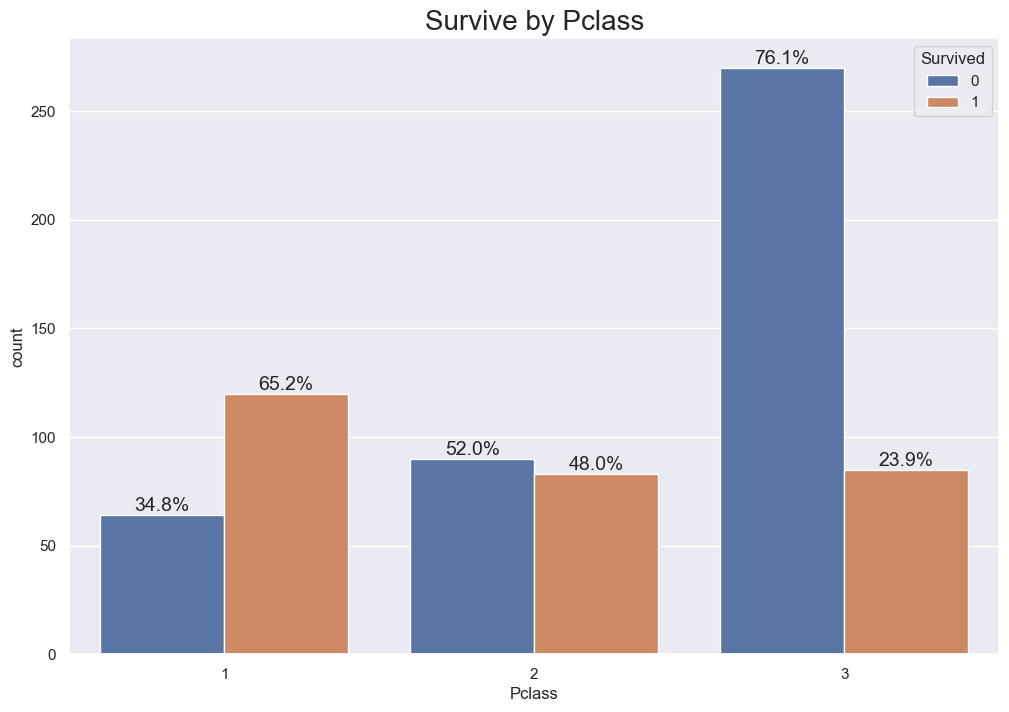

In [23]:
sns.set_theme(rc={'figure.figsize':(12,8)})
ax1 = sns.countplot(x = "Pclass", hue = "Survived", data = data1)
percentage_above_bar_relative_to_xgroup(ax1)
# 设置图片标题
plt.title('Survive by Pclass', fontsize=20)
plt.show()

#### Sex对生存的影响。男性乘客中将近80%的乘客死亡，只有20%的男性乘客幸存；而在女性乘客中则恰恰相反，说明女性的存活率更高，死亡率更低

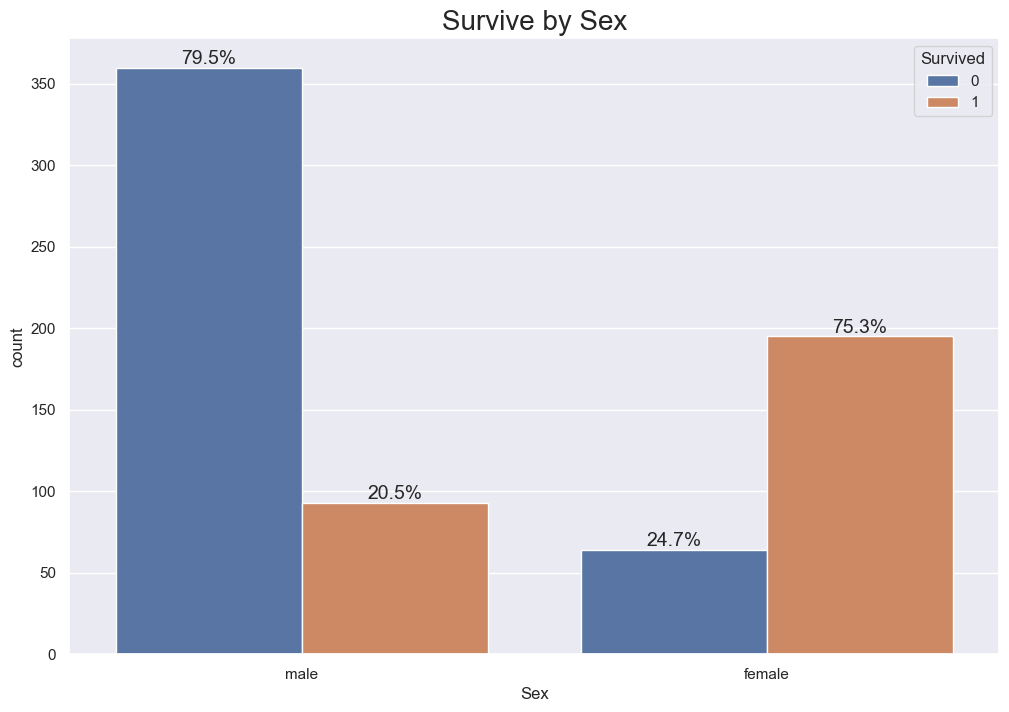

In [24]:
sns.set_theme(rc={'figure.figsize':(12,8)})
ax2 = sns.countplot(x = "Sex", hue = "Survived", data = data1)
percentage_above_bar_relative_to_xgroup(ax2)
plt.title('Survive by Sex', fontsize=20)
plt.show()

#### SibSp对生存的影响。除了有一位兄弟姐妹或配偶的乘客中，存活率大于死亡率以外，其余拥有更多或更少数量的兄弟姐妹或配偶的乘客的死亡率与存活率相差较为悬殊，且死亡率高于存活率

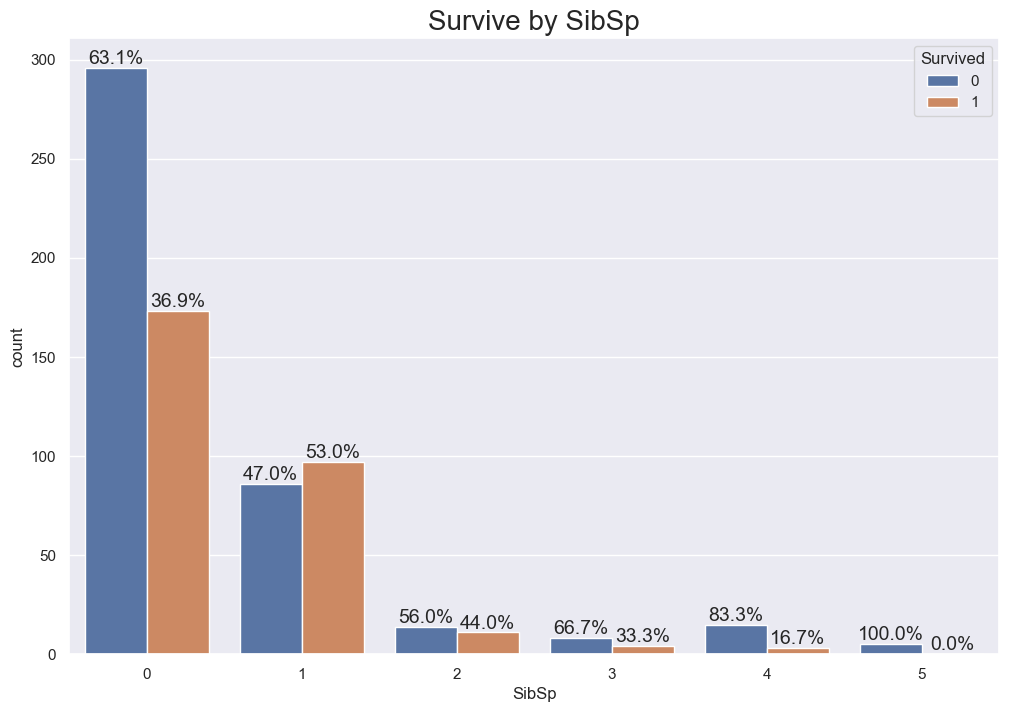

In [25]:
sns.set_theme(rc={'figure.figsize':(12,8)})
ax3 = sns.countplot(x = "SibSp", hue = "Survived", data = data1)
percentage_above_bar_relative_to_xgroup(ax3)
plt.title('Survive by SibSp', fontsize=20)
plt.show()

#### Parch对生存的影响。绝大多数乘客的父母、小孩个数为0-2个，没有直系亲属的乘客中超过60%的乘客死亡，死亡率较高，有1到2位直系亲属的乘客的存活率大致相当，都在55%左右

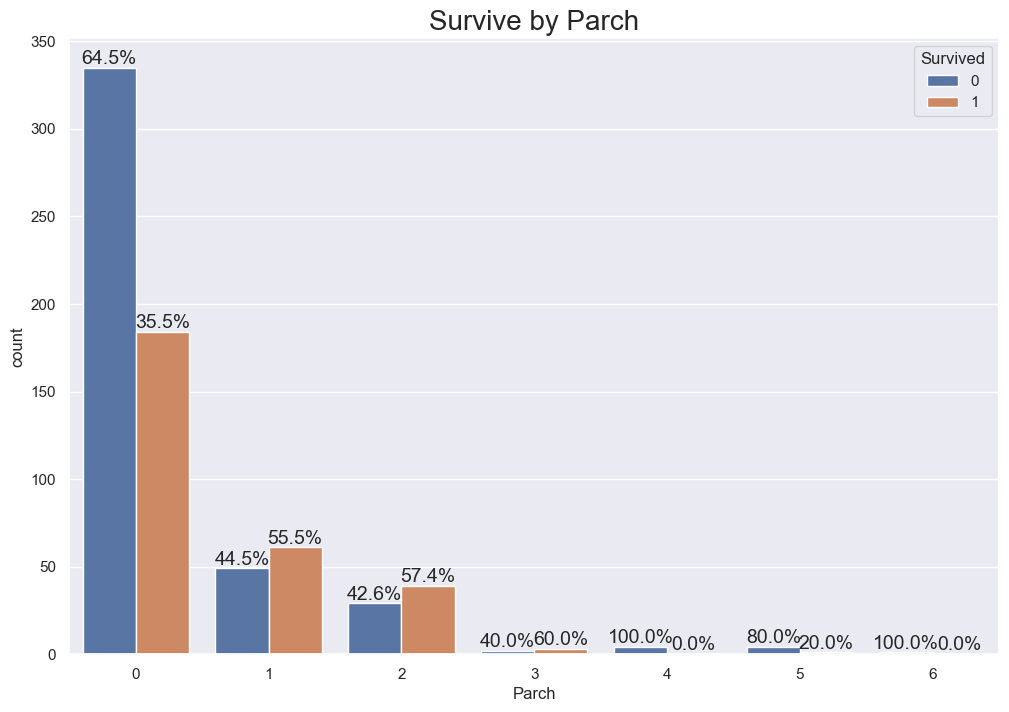

In [26]:
sns.set_theme(rc={'figure.figsize':(12,8)})
ax4 = sns.countplot(x="Parch", hue="Survived", data=data1)
percentage_above_bar_relative_to_xgroup(ax4)
plt.title('Survive by Parch', fontsize=20)
plt.show()

#### Embarked对生存的影响。在Queenstown港口上船的乘客死亡率最高，其次是在Southampton港口上船的乘客，死亡率为63.7%，在Cherbourg港口上船的乘客死亡率最低，超过60%的乘客存活

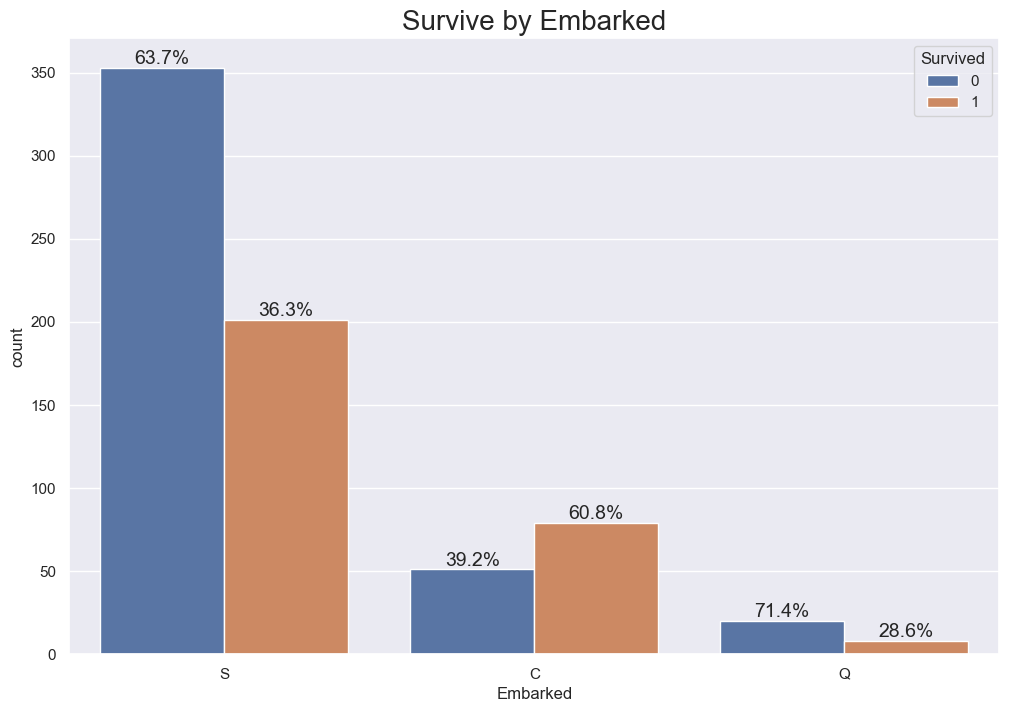

In [27]:
sns.set_theme(rc={'figure.figsize':(12,8)})
ax5 = sns.countplot(x="Embarked", hue="Survived", data=data1)
percentage_above_bar_relative_to_xgroup(ax5)
plt.title('Survive by Embarked', fontsize=20)
plt.show()

#### Age对生存的影响。存活的乘客的年龄略低于死亡乘客，说明有部分年纪较大的乘客未能存活，而存活的乘客中年纪较小的相对更多。一定程度上说明年纪大的乘客存活更困难，不过也有例外

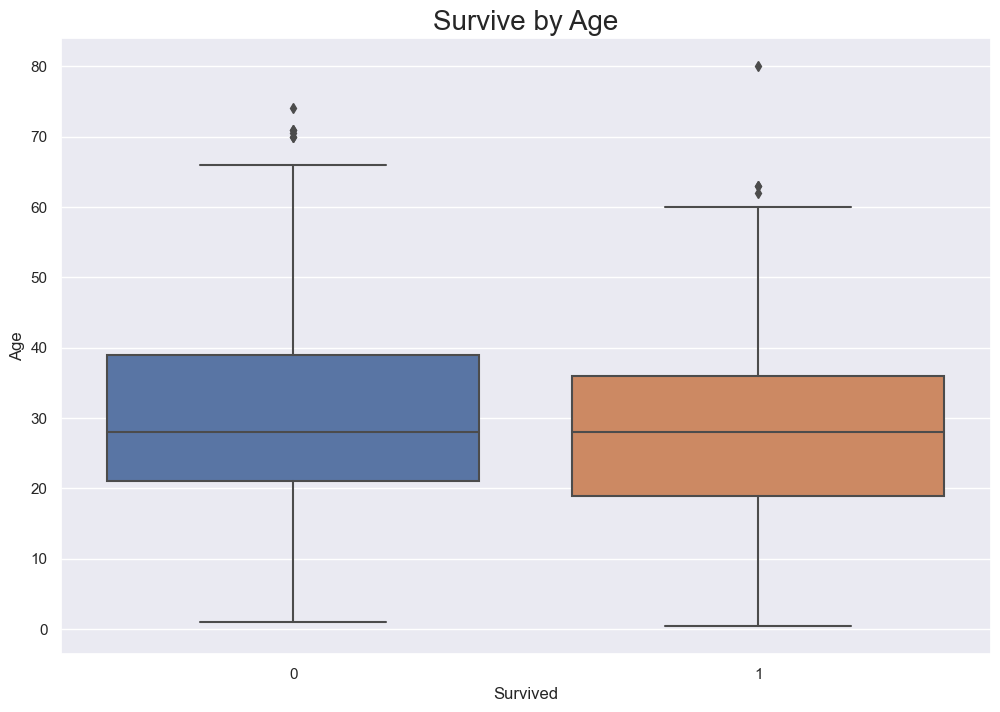

In [28]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.boxplot(x="Survived", y="Age", data=data1)
plt.title('Survive by Age', fontsize=20)
plt.show()

#### Fare对生存的影响。死亡的乘客中支付的票价相对较低，说明买便宜票的乘客难以存活，但也有支付了高票价的乘客死亡。存活的乘客支付的票价相对更高，一定程度上说明了支付票价越高越容易存活

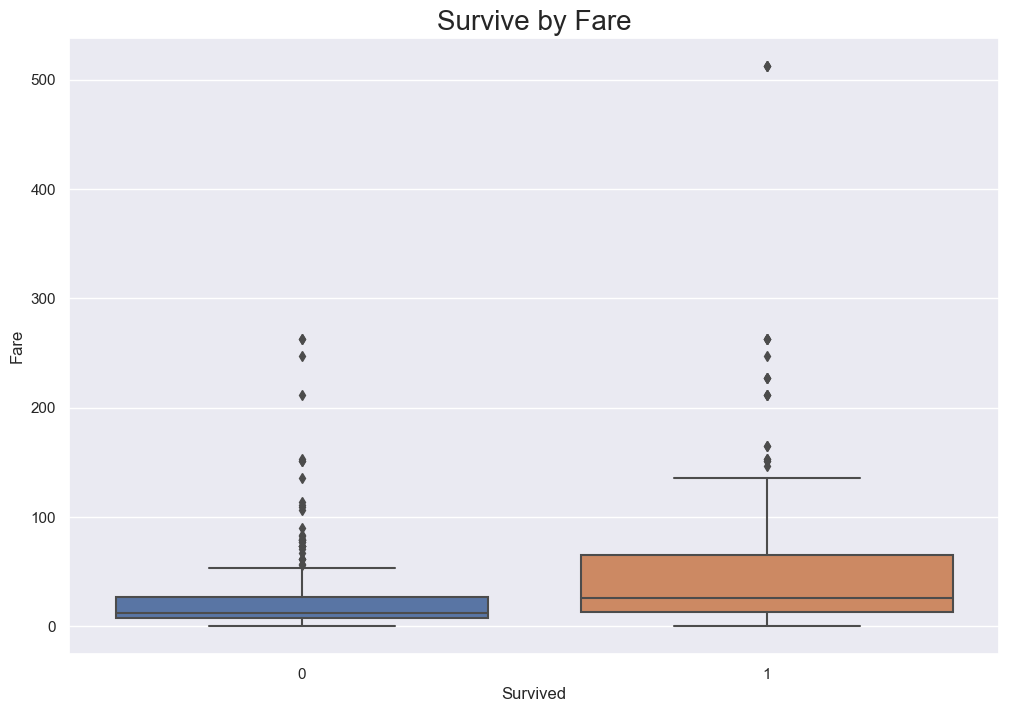

In [29]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.boxplot(x="Survived", y="Fare", data=data1)
plt.title('Survive by Fare', fontsize=20)
plt.show()

In [30]:
# 将分类变量转换为哑变量
data2 = pd.get_dummies(data1, columns=['Pclass', 'Sex', 'Embarked'],dtype=int,drop_first=True)
feature_cols = data2.columns.drop(["Survived","PassengerId"])
X = data2[feature_cols]
y = data2["Survived"]
data2.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,1


#### 划分测试集和训练集，训练集占比75%，并训练集上进行逻辑回归,得到混淆矩阵

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1, stratify = y)
model = LogisticRegression(max_iter=1000, penalty = None)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty=None)

#### 给出测试集上的分类正确率、精确率（precision）、召回率（recall）、F1 值、AUC 和 ROC 曲线。

分类正确率(Accuracy) 0.7865168539325843
精确率(Precision) 0.765625
召回率(Recall): 0.6805555555555556
F1值(test_f1): 0.7205882352941176
Testing AUC: 0.8280922431865828
[[91 15]
 [23 49]]


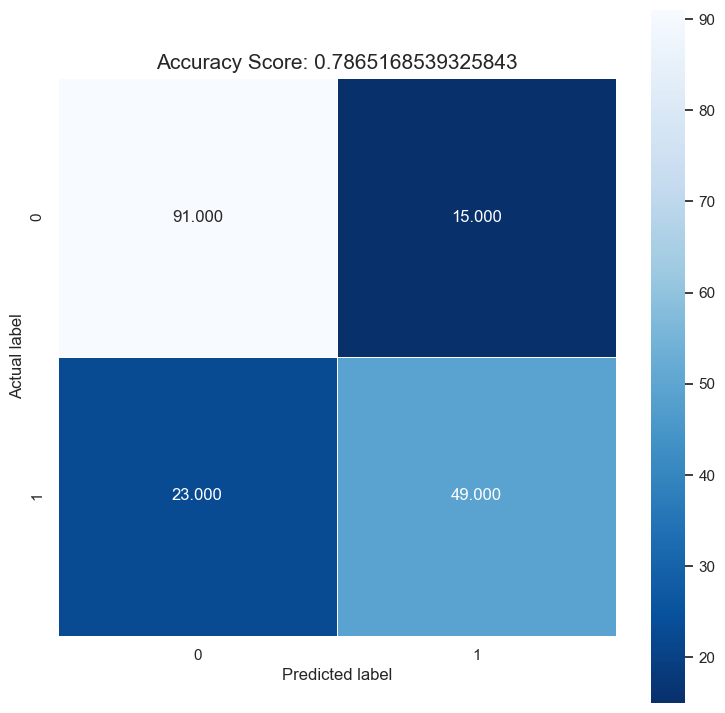

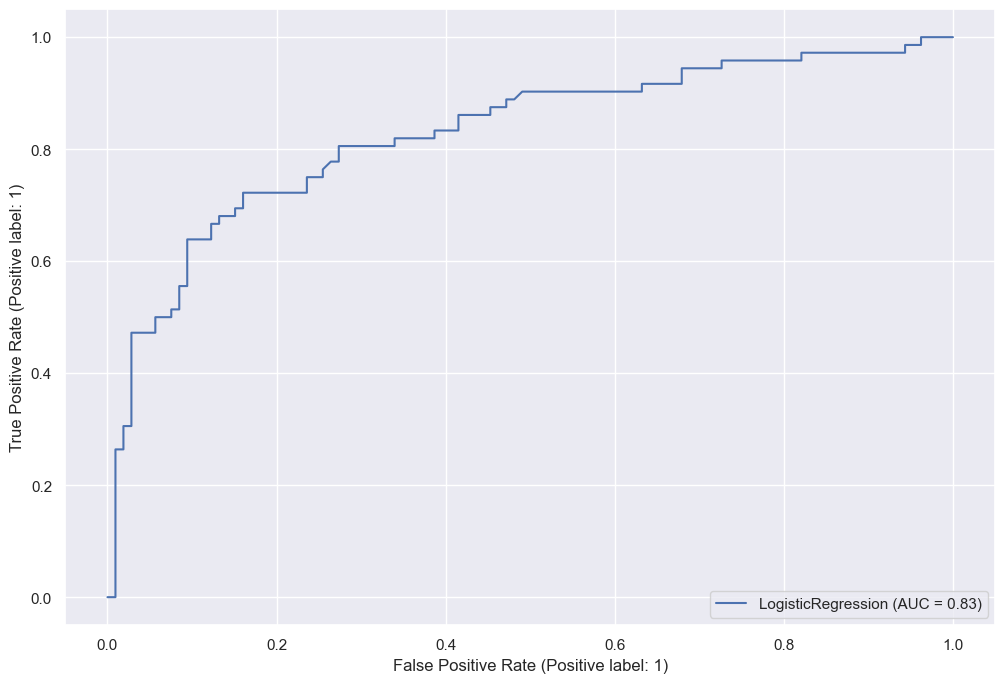

In [32]:
train_accuracy = model.score(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred_prob = model.predict_proba(X_test) 
test_accuracy = model.score(X_test, y_test)
print("分类正确率(Accuracy)", test_accuracy)
test_precision = metrics.precision_score(y_test, y_pred)
print("精确率(Precision)", test_precision)
test_recall = metrics.recall_score(y_test, y_pred)
print("召回率(Recall):", test_recall)
test_f1 = metrics.f1_score(y_test, y_pred)
print("F1值(test_f1):", test_f1)

test_auc_roc = metrics.roc_auc_score(y_test, y_pred_prob[::,1])
print('Testing AUC:',  test_auc_roc)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # type: ignore
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15)

metrics.RocCurveDisplay.from_estimator(model,X_test,y_test)

#### 根据回归的结果得到系数如下，Fare对乘客的存活有促进作用，直系亲属数量越多，年龄越大，兄弟姐妹越多越不容易存活。根据回归的结果，支付的票价高，年纪较小，船舱等级高，兄弟姐妹等家人越少，且在C港口上船的女性乘客更容易存活

In [33]:
coef = model.coef_[0]
exp_coef = np.exp(coef)
df1 = pd.DataFrame(exp_coef, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

df2 = pd.DataFrame(coef, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

print(df1)
print()
print(df2)

                coef
Fare        1.000804
Parch       0.985890
Age         0.950466
SibSp       0.688804
Embarked_S  0.667770
Pclass_2    0.330203
Embarked_Q  0.207686
Pclass_3    0.081963
Sex_male    0.066349

                coef
Fare        0.000803
Parch      -0.014211
Age        -0.050803
SibSp      -0.372798
Embarked_S -0.403811
Pclass_2   -1.108049
Embarked_Q -1.571727
Pclass_3   -2.501484
Sex_male   -2.712832


#### 对数据进行标准化


In [34]:
scaler = StandardScaler() ## 定义使用标准化做缩放
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test) 

#### 进行带正则化的逻辑回归

In [35]:
model1 = LogisticRegressionCV(cv=5, random_state=0, solver="saga", penalty='l1',max_iter=1000, fit_intercept=True)
model1.fit(X_train1, y_train)
y_pred1 = model1.predict(X_test1)
y_pred_prob1 = model1.predict_proba(X_test1)
coef = model1.coef_[0]
df3 = pd.DataFrame(coef, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)
print(model1.C_)
print(df3)


[0.35938137]
                coef
Fare        0.057756
Parch       0.000000
Embarked_S -0.145968
Embarked_Q -0.212303
SibSp      -0.261862
Pclass_2   -0.344835
Age        -0.627380
Pclass_3   -1.082958
Sex_male   -1.227049


分类正确率(Accuracy) 0.4438202247191011
精确率(Precision) 0.42011834319526625
召回率(Recall): 0.9861111111111112
F1值(test_f1): 0.5892116182572614
Testing AUC: 0.8198375262054507
[[ 8 98]
 [ 1 71]]


c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have v

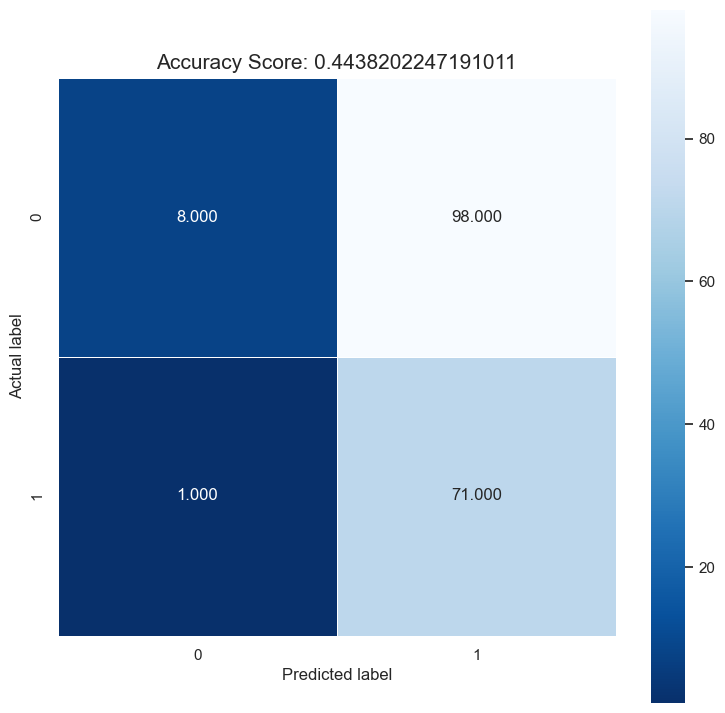

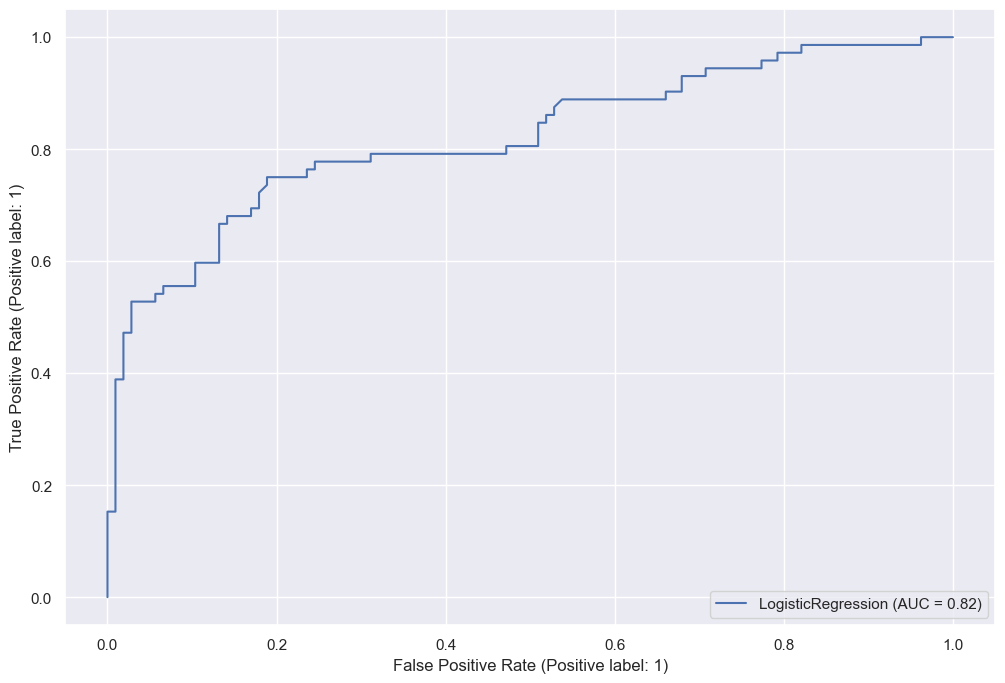

In [36]:
train_accuracy = model.score(X_train1, y_train)
y_pred = model.predict(X_test1) 
y_pred_prob = model.predict_proba(X_test1) 
test_accuracy = model.score(X_test1, y_test)
print("分类正确率(Accuracy)", test_accuracy)
test_precision = metrics.precision_score(y_test, y_pred)
print("精确率(Precision)", test_precision)
test_recall = metrics.recall_score(y_test, y_pred)
print("召回率(Recall):", test_recall)
test_f1 = metrics.f1_score(y_test, y_pred)
print("F1值(test_f1):", test_f1)

test_auc_roc = metrics.roc_auc_score(y_test, y_pred_prob[::,1])
print('Testing AUC:',  test_auc_roc)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # type: ignore
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15)

metrics.RocCurveDisplay.from_estimator(model,X_test1,y_test)